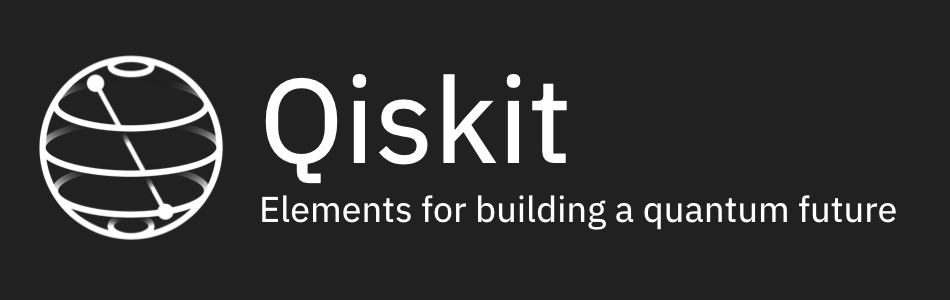

# Start Coding with Qiskit

## Table of Contents

1. [Overview](#overview)
2. [Step-by-Step walk-through](#walk-through)
    * [Step 1: Import packages](#step_1)
    * [Step 2: Initialize variables](#step_2)
    * [Step 3: Add gates](#step_3)
    * [Step 4: Visualize the circuit](#step_4)
    * [Step 5: Simulate the experiment](#step_5)
    * [Step 6: Visualize the results](#step_6)
3. [Next steps](#next_steps)


## Overview <a name='overview'></a>

The workflow of using Qiskit consists of three high-level steps:

- **Build**: design a quantum circuit that represents the problem you are considering.
- **Execute**: run experiments on different backends (which include both systems and simulators).
- **Analyze**: calculate summary statistics and visualize the results of experiments.

Here is an example of the entire workflow, with each step explained in detail in subsequent sections:


Total count for 00 and 11 are: {'00': 491, '11': 509}


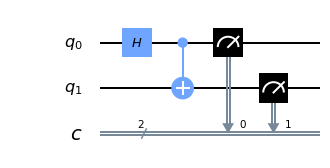

In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
%matplotlib inline

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw('mpl')

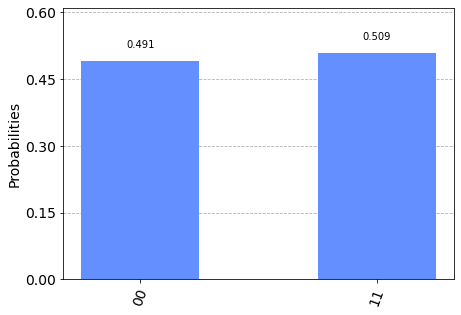

In [2]:
# Plot a histogram
plot_histogram(counts)

## Step-by-Step walk-through <a name='walk-through'></a>

The program above can be broken down into six steps:

* [Step 1: Import packages](#step_1)
* [Step 2: Initialize variables](#step_2)
* [Step 3: Add gates](#step_3)
* [Step 4: Visualize the circuit](#step_4)
* [Step 5: Simulate the experiment](#step_5)
* [Step 6: Visualize the results](#step_6)

### Step 1: Import packages <a name='step_1'></a>

The basic elements needed for your program are imported as follows:

In [3]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In more detail, the imports are

- `QuantumCircuit`: can be thought as the instructions of the quantum system. It holds all your quantum operations.
- `execute`: runs your circuit / experiment.
- `Aer`: handles simulator backends.
- `plot_histogram`: creates histograms.

### Step 2: Initialize variables <a name='step_2'></a>

Consider the next line of code

```
circuit = QuantumCircuit(2, 2)
```

Here, you are initializing with 2 qubits in the zero state; with 2 classical bits set to zero; and circuit is the quantum circuit.

Syntax:

- `QuantumCircuit(int, int)`

### Step 3: Add gates <a name='step_3'></a>

You can add gates (operations) to manipulate the registers of your circuit.

Consider the following three lines of code:

```
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
```

The gates are added to the circuit one-by-one to form the Bell state

$$|\psi\rangle = \left(|00\rangle+|11\rangle\right)/\sqrt{2}$$.

The code above applies the following gates:

- `QuantumCircuit.h(0)`: A Hadamard gate $H$ on qubit 0, which puts it into a **superposition state**.
- `QuantumCircuit.cx(0, 1)`: A controlled-Not operation ($C_{X}$) on control qubit 0 and target qubit 1, putting the qubits in an **entangled state**.
- `QuantumCircuit.measure([0,1], [0,1])`: if you pass the entire quantum and classical registers to `measure`, the ith qubit’s measurement result will be stored in the ith classical bit.

### Step 4: Visualize the circuit <a name='step_4'></a>

You can use `QuantumCircuit.draw()` to view the circuit that you have designed
in the [various forms](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html#qiskit.circuit.QuantumCircuit.draw) used in many textbooks and research articles.

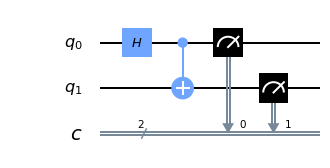

In [4]:
circuit.draw('mpl')

In this circuit, the qubits are ordered with qubit zero at the top and
qubit one at the bottom. The circuit is read left-to-right, meaning that gates
which are applied earlier in the circuit show up farther to the left.

The default backend for `QuantumCircuit.draw()` or `qiskit.visualization.circuit_drawer()`
is the text backend. However, depending on your local environment you may want to change
these defaults to something better suited for your use case. This is done with the user
config file.  By default the user config file should be located in
`~/.qiskit/settings.conf` and is a `.ini` file.

For example, a `settings.conf` file for setting a Matplotlib drawer is:

```
  [default]
  circuit_drawer = mpl
```

You can use any of the valid circuit drawer backends as the value for this config, this includes
text, mpl, latex, and latex_source.

### Step 5: Simulate the experiment <a name='step_5'></a>

Qiskit Aer is a high performance simulator framework for quantum circuits. It provides [several backends](https://qiskit.org/documentation/apidoc/aer_provider.html#simulator-backends) to achieve different simulation goals.

If you have issues installing Aer, you can alternatively use the Basic Aer
provider by replacing `Aer` with `BasicAer`. Basic Aer is included in Qiskit
Terra.

```
    import numpy as np
    from qiskit import(
      QuantumCircuit,
      execute,
      BasicAer)
    ...
```

To simulate this circuit, you will use the `qasm_simulator`. Each run of this
circuit will yield either the bit string 00 or 11.

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 514, '11': 486}


As expected, the output bit string is 00 approximately 50 percent of the time.
The number of times the circuit is run can be specified via the `shots`
argument of the `execute` method. The number of shots of the simulation was
set to be 1000 (the default is 1024).

Once you have a `result` object, you can access the counts via the method
`get_counts(circuit)`. This gives you the aggregate outcomes of the
experiment you ran.

### Step 6: Visualize the results <a name='step_6'></a>

Qiskit provides [many visualizations](https://qiskit.org/documentation/apidoc/visualization.html),

including the function `plot_histogram`, to view your results.

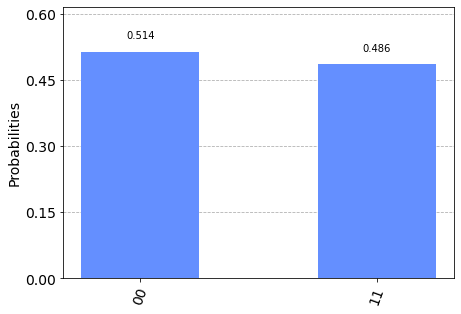

In [6]:
plot_histogram(counts)

The observed probabilities $Pr(00)$ and $Pr(11)$ are computed by
taking the respective counts and dividing by the total number of shots.

Try changing the `shots` keyword in the `execute` method to see how
the estimated probabilities change.

## Next steps <a name='next_steps'></a>

Now that you have learnt the basics, consider these resources:

- [About the Qiskit framework](https://qiskit.org/documentation/the_elements.html)
- [Qiskit documentation](https://qiskit.org/documentation/apidoc/qiskit.html)
- [Qiskit tutorials](https://quantum-computing.ibm.com/jupyter/tutorial/1_start_here.ipynb)
- [Textbook: Learn Quantum Computing using Qiskit](https://community.qiskit.org/textbook/preface)
- [Video series: Coding with Qiskit](https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright